# Ансамбли моделей машинного обучения.

## Описание датасета

Ирисы фишера - выбрвнный датасет, он отлично подходит для решения задач классификации

In [123]:
import numpy as np
import pydotplus
import pandas as pd
from typing import Dict, Tuple
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
import seaborn as sns
from sklearn import preprocessing
from sklearn import datasets
from sklearn import utils
from sklearn.ensemble import BaggingClassifier
from IPython.display import Image
from sklearn.ensemble import AdaBoostClassifier
from io import StringIO 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from heamy.estimator import Regressor, Classifier
from heamy.pipeline import ModelsPipeline
from heamy.dataset import Dataset

ds = datasets.load_iris()
ds.data[:5]
np.unique(ds.target)
iris_df = pd.DataFrame(data= np.c_[ds['data'], ds['target']],
                     columns= ds['feature_names'] + ['target'])
iris_df.describe()


sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000

## Деление выборки на обучающую и тестовую

In [124]:
X_train, X_test, y_train, y_test = train_test_split(
    ds.data, ds.target, test_size=0.5, random_state=1)

In [125]:
# Размер обучающей модели
X_train.shape, y_train.shape

((75, 4), (75,))

In [126]:
# Размер тестовой выборки
X_test.shape, y_test.shape

((75, 4), (75,))

## Обучение моделей

### Бэггинг

In [127]:
# Обучим классификатор на 5 деревьях
iris_X = ds.data[:, :2]
iris_y = ds.target
bc1 = BaggingClassifier(n_estimators=5, oob_score=True, random_state=10)
bc1.fit(iris_X, iris_y)

/usr/local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


BaggingClassifier(n_estimators=5, oob_score=True, random_state=10)

Далее мы посмотрим какие объекты были использованы в обучающей выборке каждого дерева

In [128]:
bc1.estimators_samples_

[array([137, 103, 142, 138,  26, 138,  50, 126,  67,  34,  24,  43, 149,
         58, 112, 118, 104,  46, 104,  27,  74, 147,  37,  45, 132,  44,
        142,  69,  74,  23, 108,  64,   0,  50,  78,  42, 112,  77,  50,
          4, 114,  14,  56, 105,  43,  39,  43, 139,  80, 127, 116,  56,
         54, 110, 138, 136,   4,  79,  62,  44,  60, 111,  74, 114, 125,
        137, 102,  88,  14, 130, 107, 110, 118,  41,  62,  66,  37,  14,
         52, 120, 117,  68,  73,  39, 104,  92,  44, 139,  22,  66, 107,
         27,  85,  54,  40, 146,  95,  38,  92,  97,  61, 116,  73, 116,
         68,  48,  20, 124,  82,  37,  58, 101,   7, 123, 141, 146,  38,
        116, 105,  91,   7,   0, 131,   3,  22,  59, 133,  20, 106, 123,
         11, 121,  66,  18,  46,  52, 147,  62,  89,  86,  37, 115, 132,
         38,  90,  84,  86,  25,  48,  77]),
 array([ 95,  46,  93, 129,  44, 136,  87, 149,  61,  68,  87, 102,  31,
         34,  17,  58,  38,  79, 149,  88,  70,  22,  88, 112, 115,  52,
      

In [129]:
# Сконвертируем эти данные в двоичную матрицу, 
# 1 соответствует элементам, попавшим в обучающую выборку
bin_array = np.zeros((5, iris_X.shape[0]))
for i in range(5):
    for j in bc1.estimators_samples_[i]:
        bin_array[i][j] = 1
bin_array

array([[1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
        0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
        1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
        1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1.,
        0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
        1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
        0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
        0., 0., 1., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
        0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
        0., 0., 1., 1., 1., 0.,

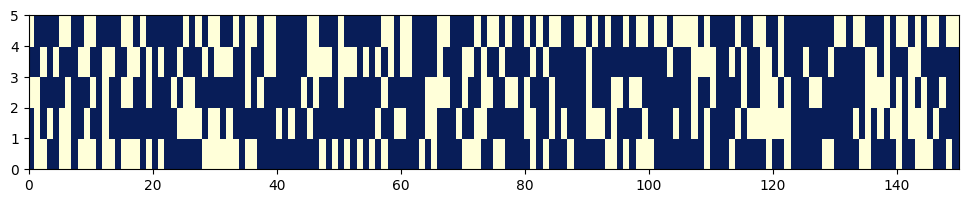

In [130]:
# И визуализируем (синим цветом показаны данные, которые попали в обучающую выборку)
fig, ax = plt.subplots(figsize=(12,2))
ax.pcolor(bin_array, cmap='YlGnBu')
plt.show()

In [131]:
# Оценим Out-of-bag error, теоретическое значение 37%
for i in range(5):
    cur_data = bin_array[i]
    len_cur_data = len(cur_data)
    sum_cur_data = sum(cur_data)
    (len(bin_array[0]) - sum(bin_array[0])) / len(bin_array[0])
    oob_i = (len_cur_data - sum_cur_data) / len_cur_data
    print('Для модели № {} размер OOB составляет {}%'.format(i+1, round(oob_i, 4)*100.0))

Для модели № 1 размер OOB составляет 38.0%
Для модели № 2 размер OOB составляет 35.33%
Для модели № 3 размер OOB составляет 33.33%
Для модели № 4 размер OOB составляет 36.67%
Для модели № 5 размер OOB составляет 42.67%


In [132]:
# Out-of-bag error, возвращаемый классификатором
# Для классификации используется метрика accuracy
bc1.oob_score_, 1-bc1.oob_score_

(0.6933333333333334, 0.30666666666666664)

In [133]:
# Параметр oob_decision_function_ возвращает вероятности 
# принадлежности объекта к классам на основе oob
# В данном примере три класса, 
# значения nan могут возвращаться в случае маленькой выборки
bc1.oob_decision_function_[55:70]

array([[0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.33333333, 0.66666667],
       [0.        , 0.5       , 0.5       ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.5       , 0.5       ],
       [       nan,        nan,        nan],
       [0.        , 0.5       , 0.5       ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.83333333, 0.16666667],
       [0.        , 1.        , 0.        ],
       [0.        , 0.25      , 0.75      ],
       [       nan,        nan,        nan],
       [0.        , 0.        , 1.        ]])

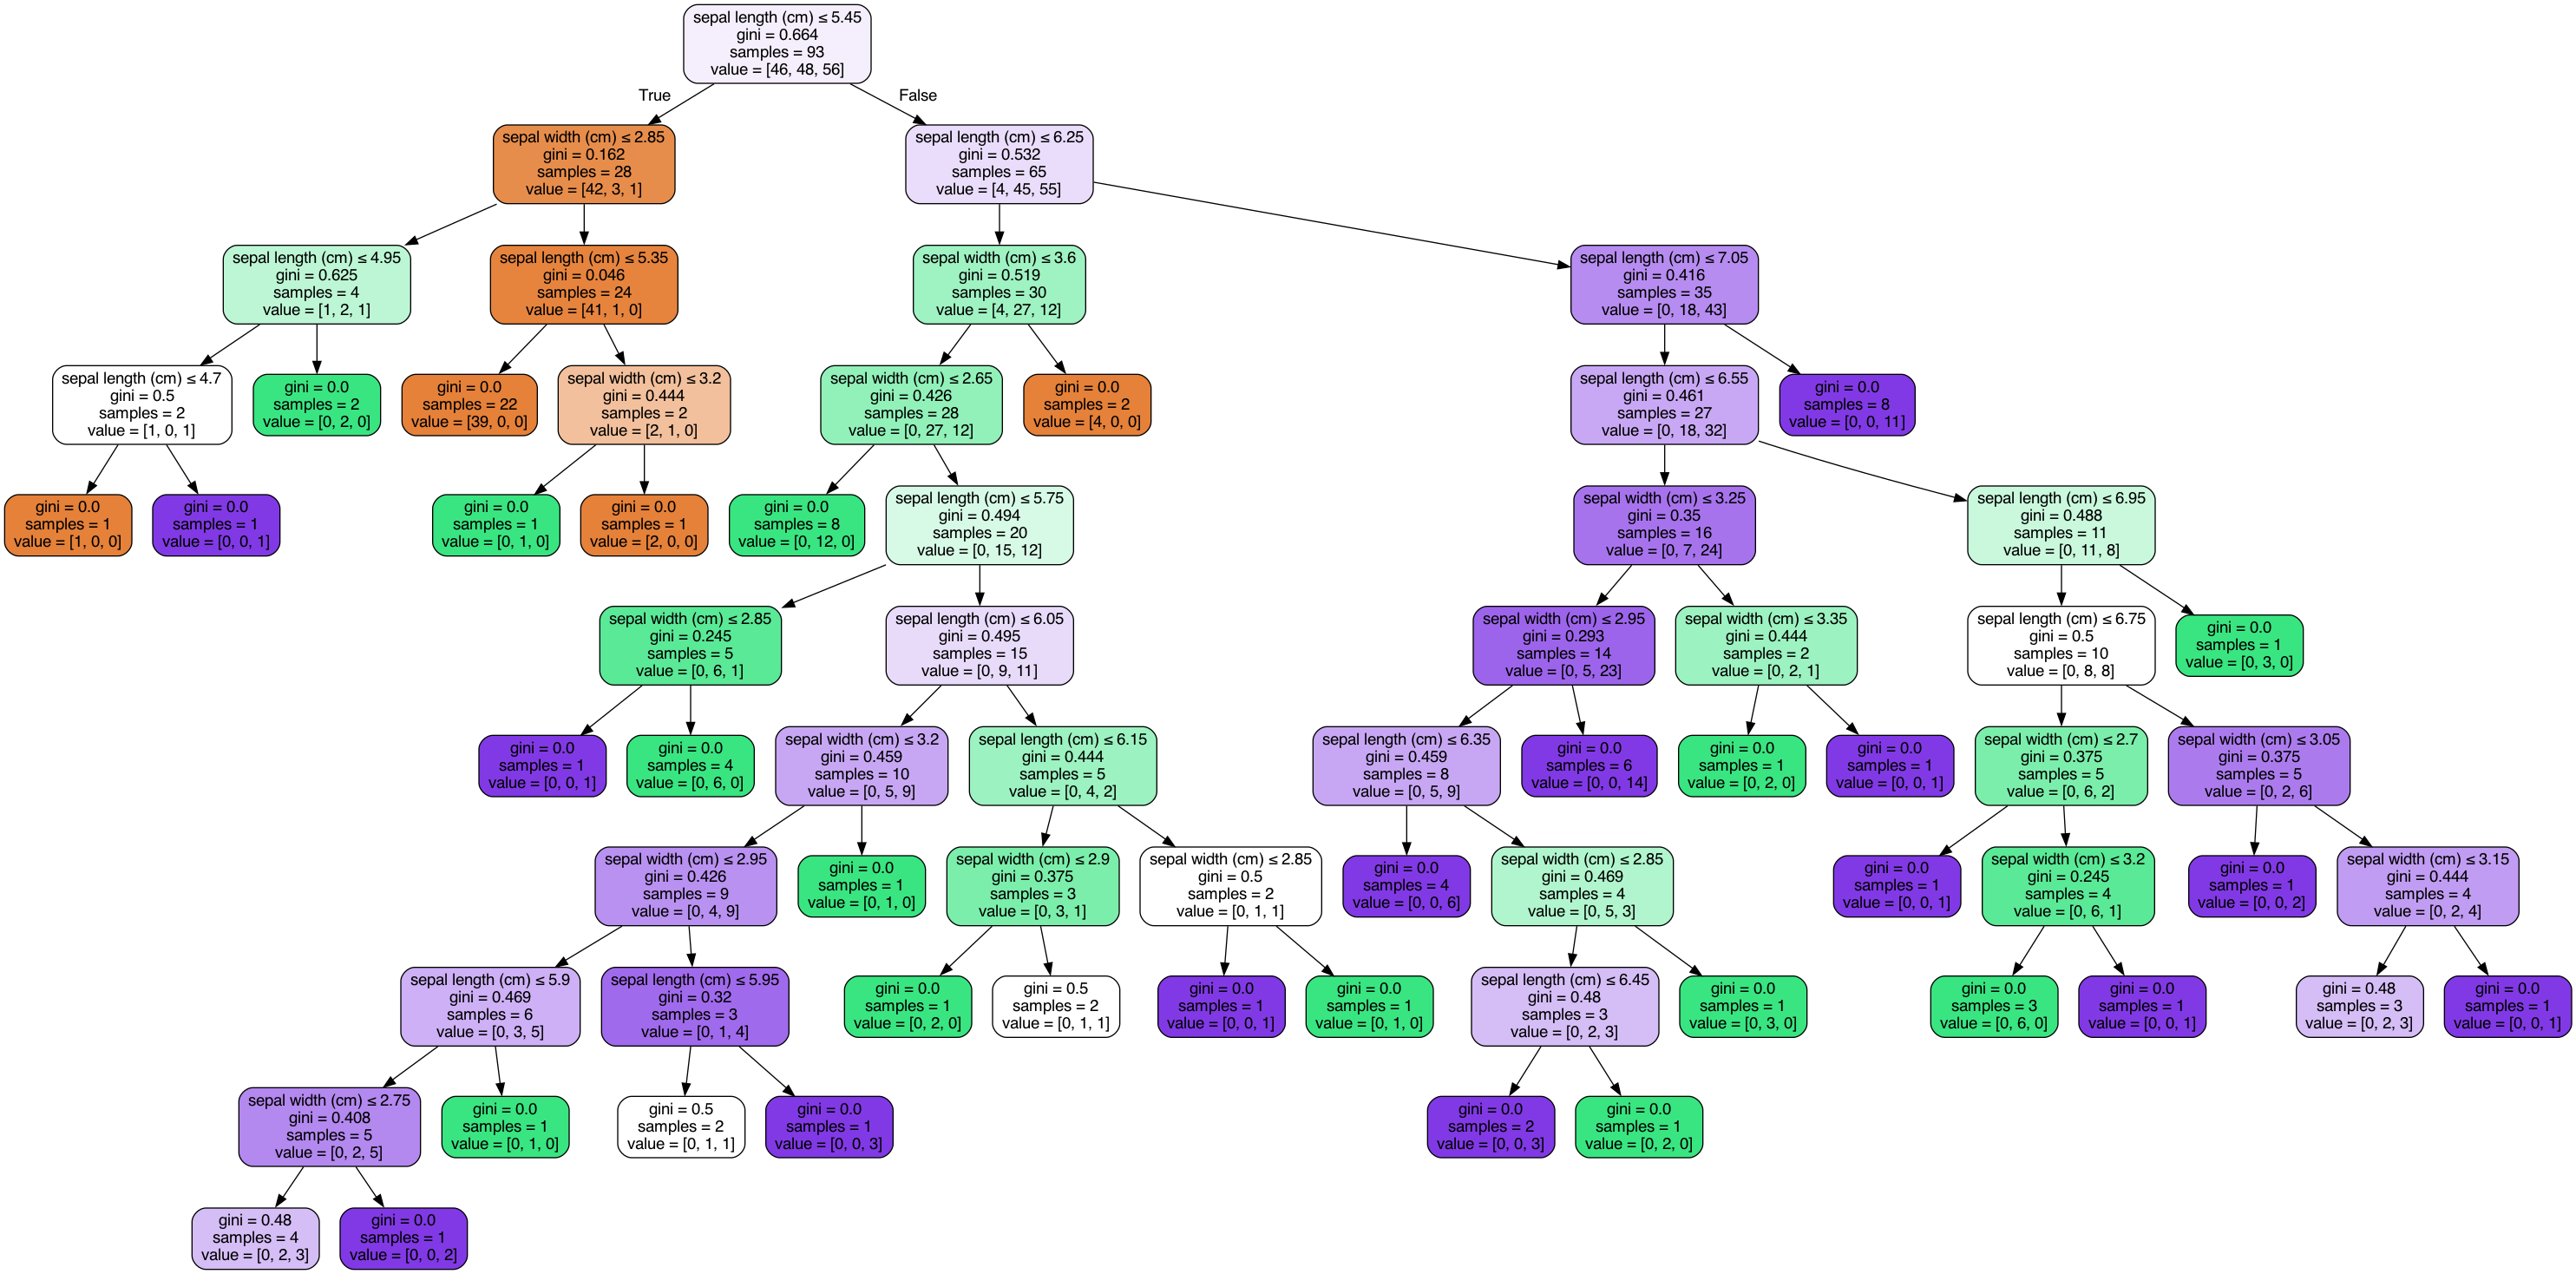

In [134]:
def get_png_tree(tree_model_param, feature_names_param):
    dot_data = StringIO()
    export_graphviz(tree_model_param, out_file=dot_data, feature_names=feature_names_param,
                    filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()
Image(get_png_tree(bc1.estimators_[0], ds.feature_names[:2]), width='80%')


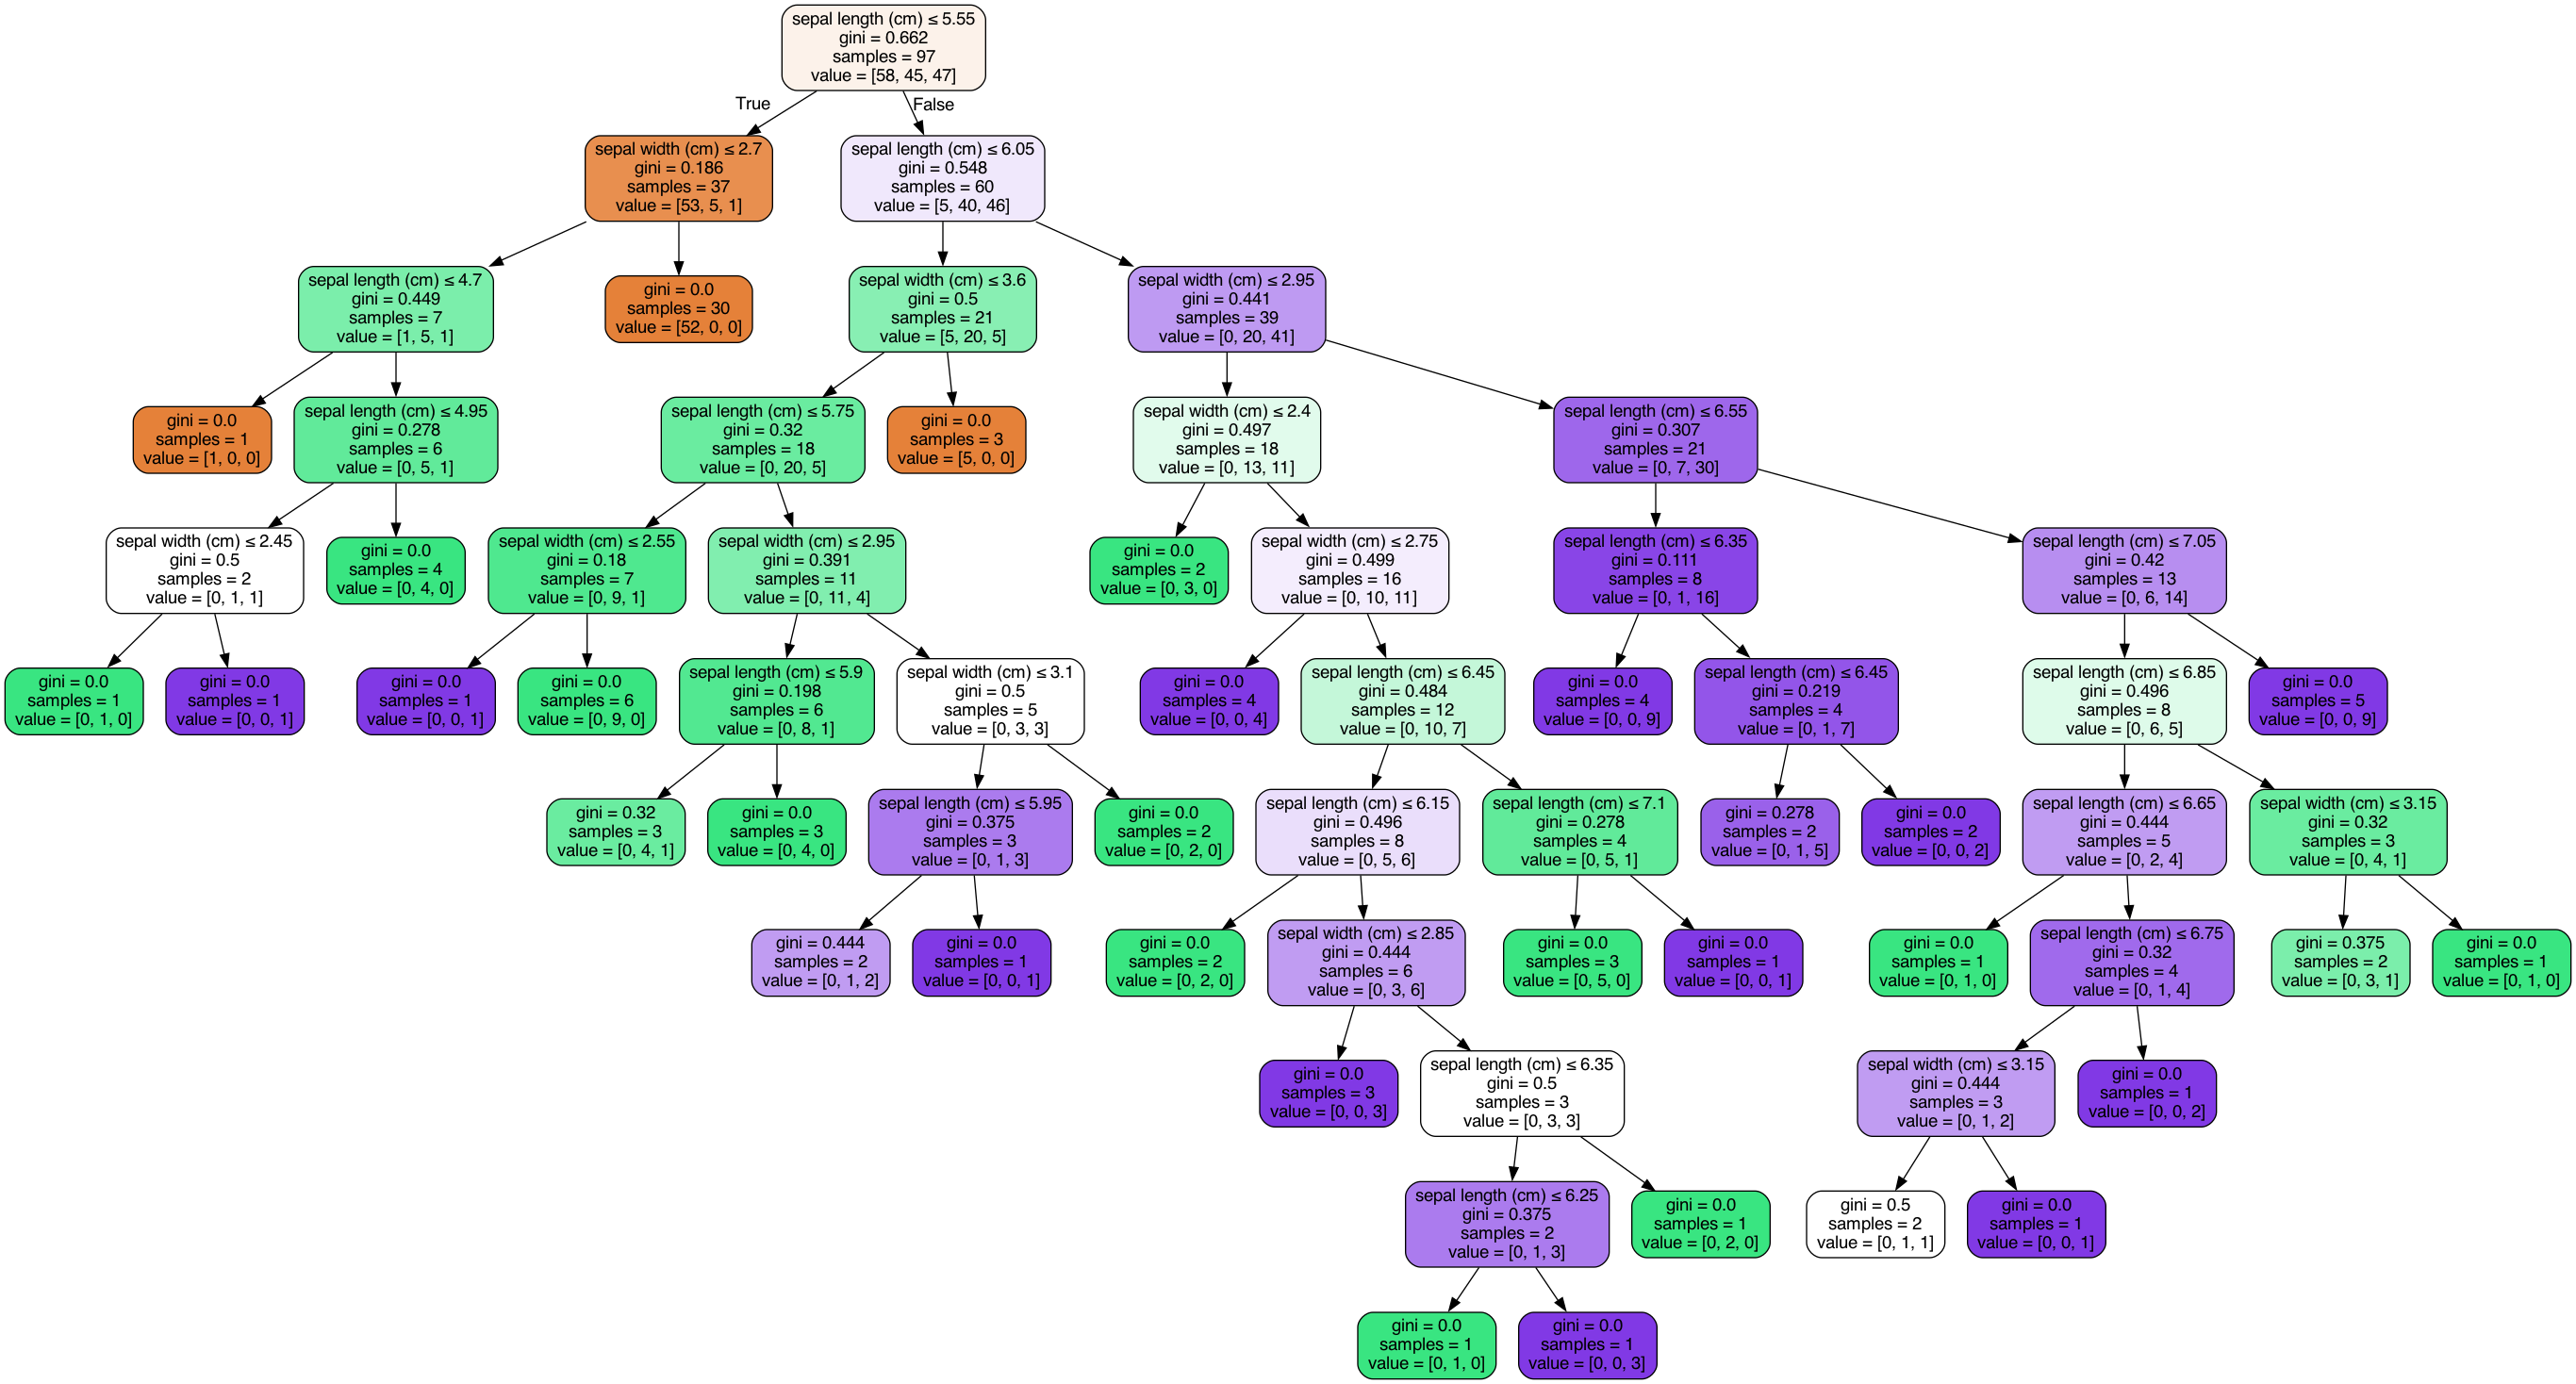

In [135]:
Image(get_png_tree(bc1.estimators_[1], ds.feature_names[:2]), width='80%')

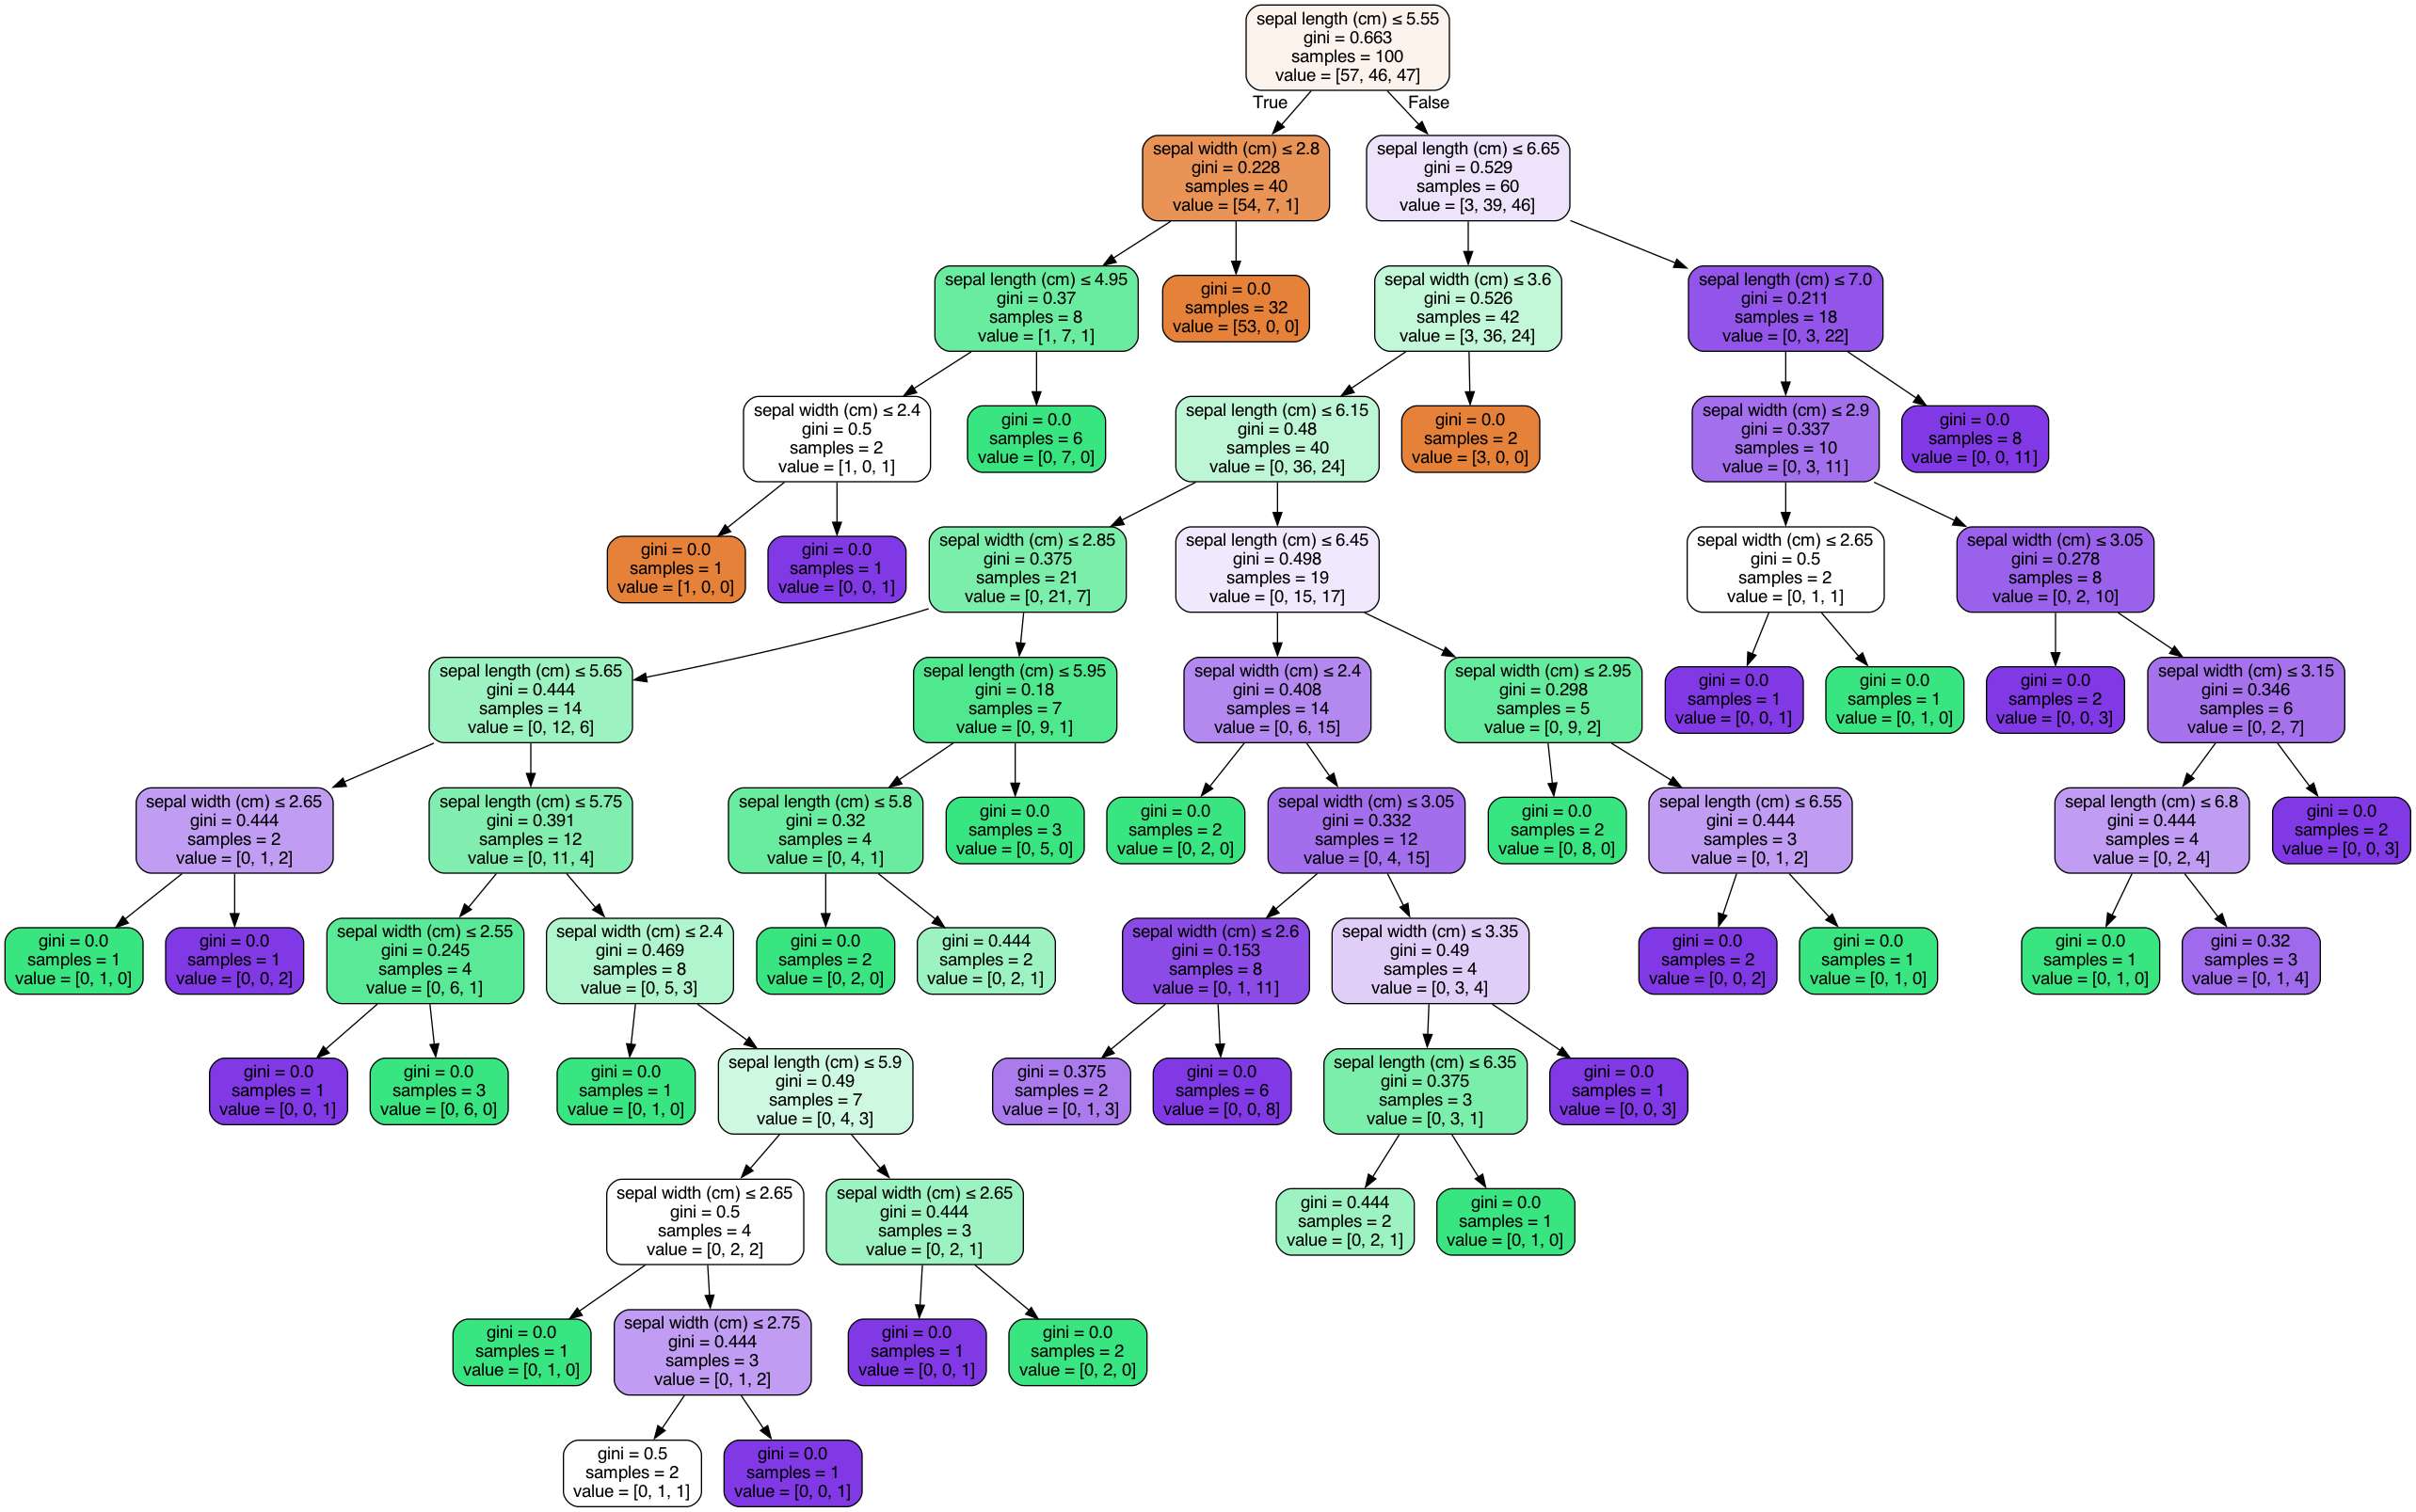

In [136]:
Image(get_png_tree(bc1.estimators_[2], ds.feature_names[:2]), width='80%')

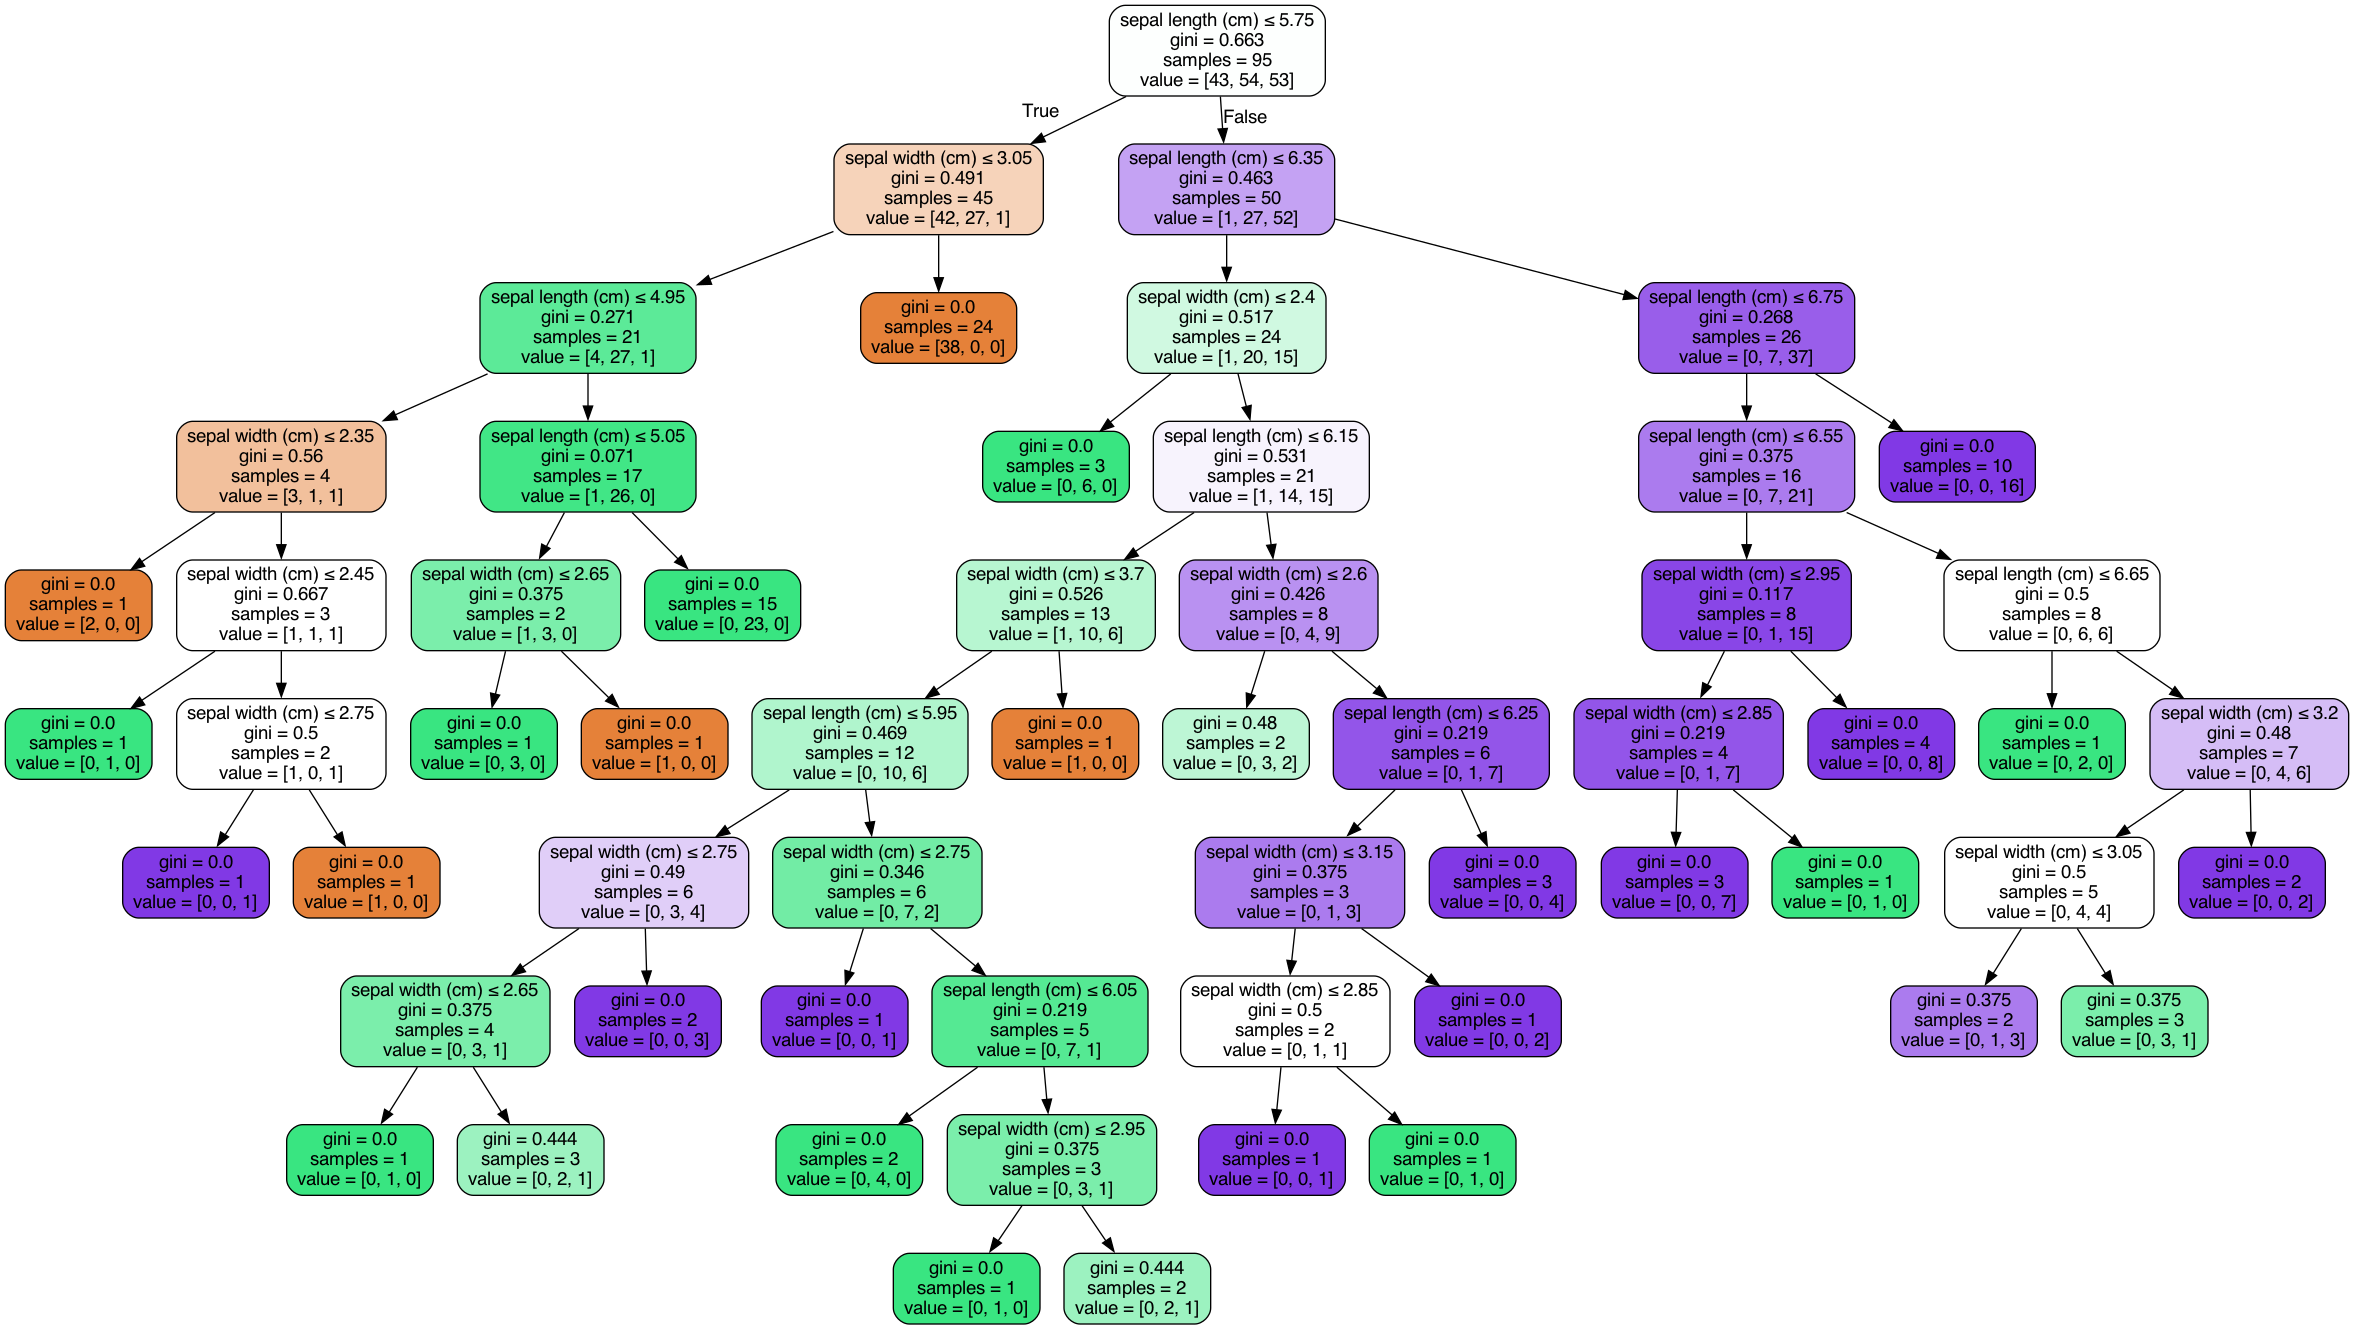

In [137]:
Image(get_png_tree(bc1.estimators_[3], ds.feature_names[:2]), width='80%')

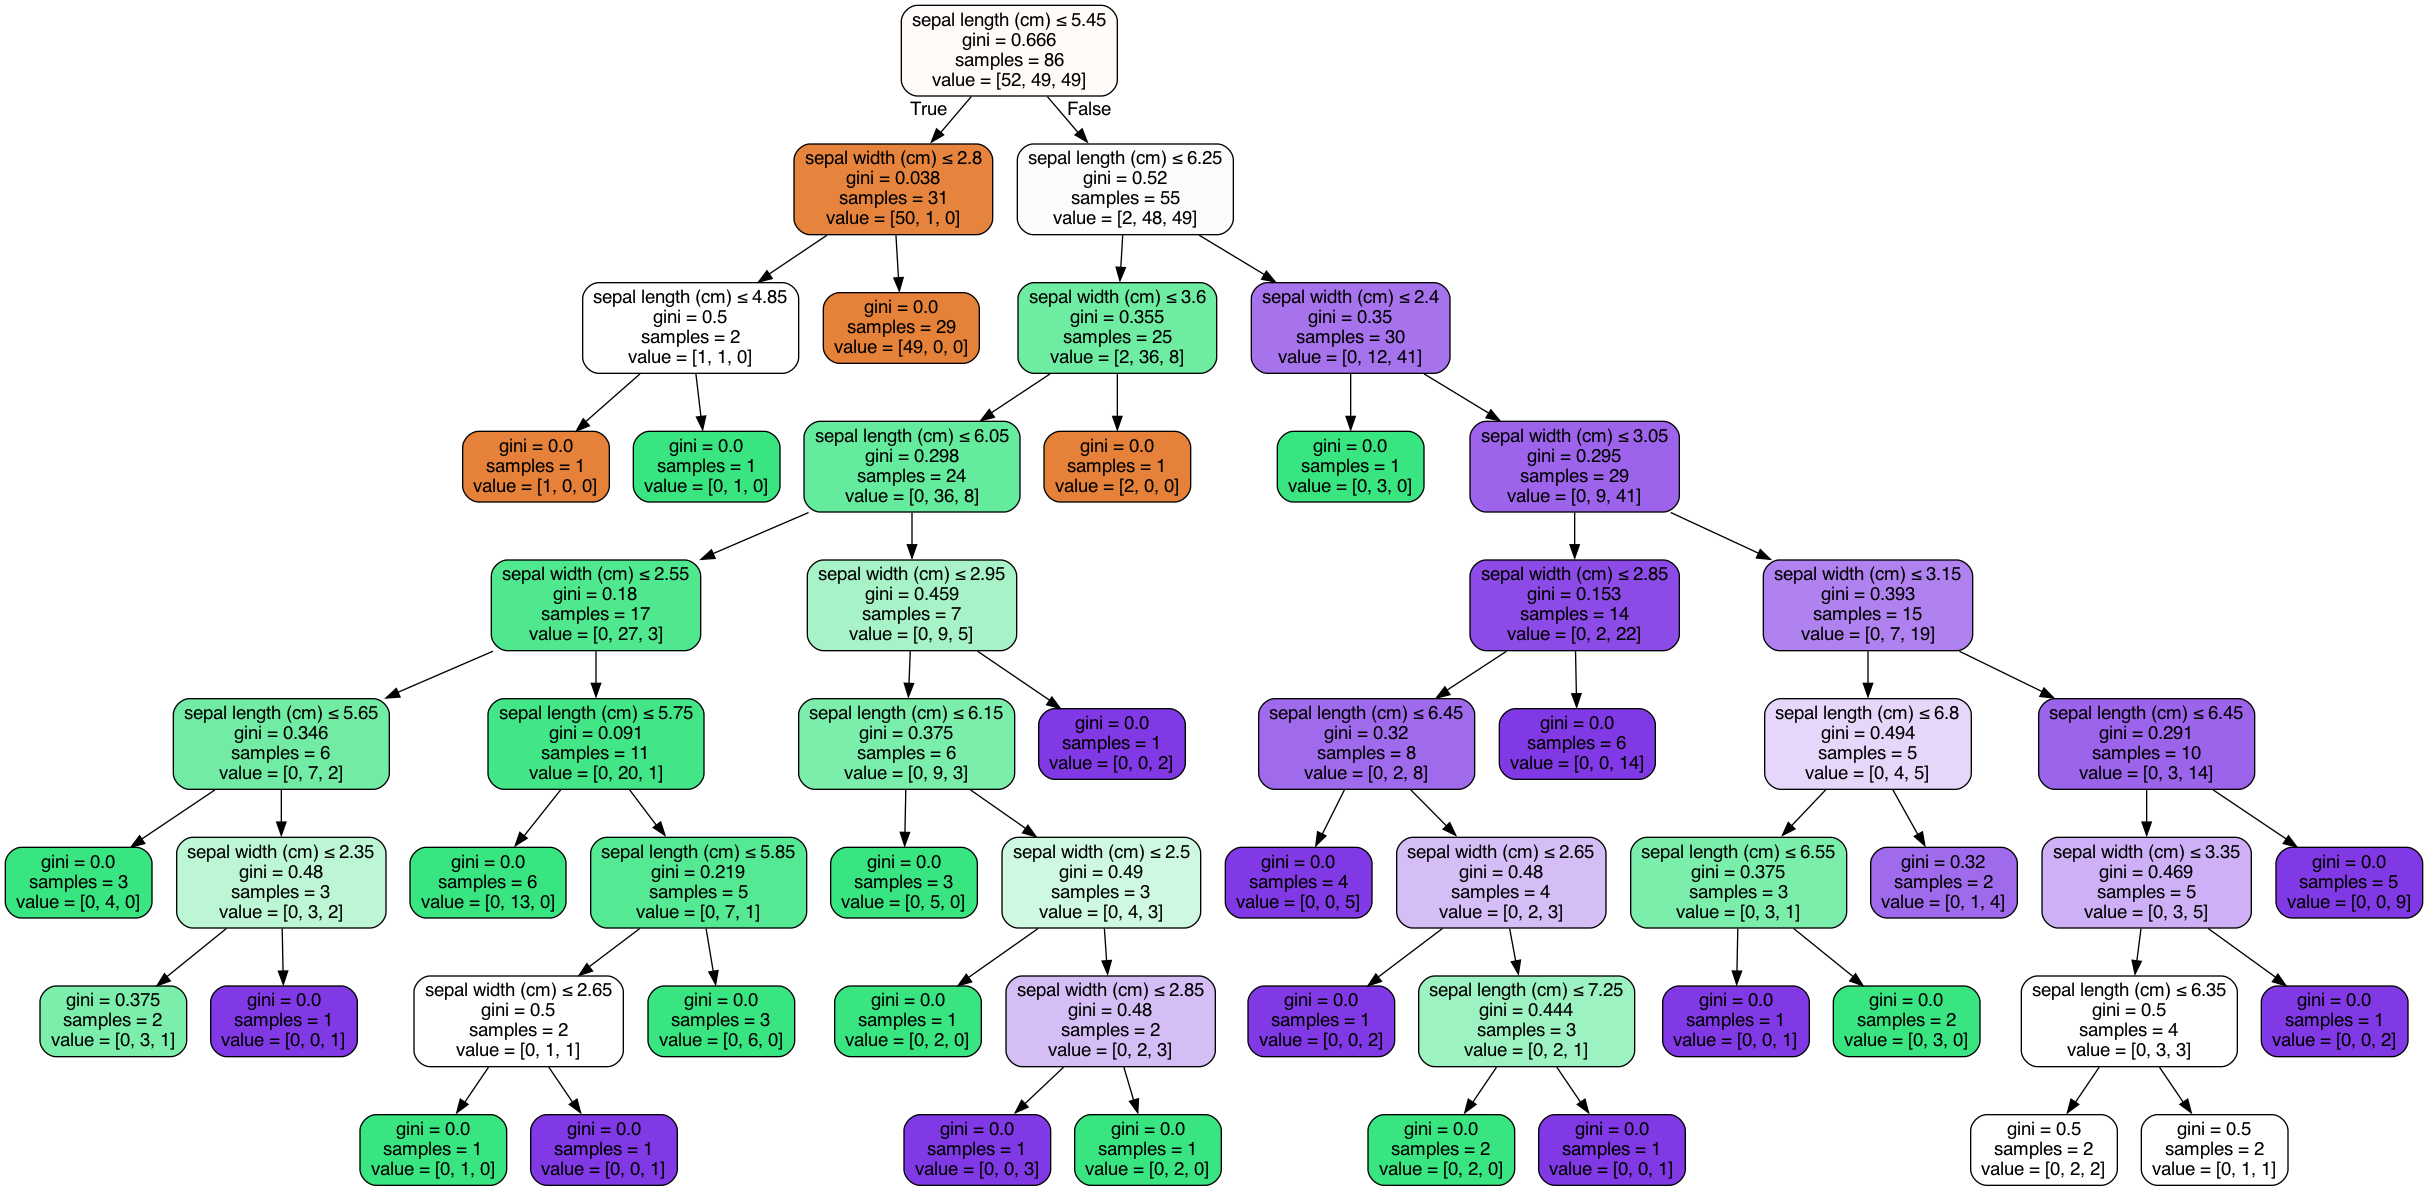

In [138]:
Image(get_png_tree(bc1.estimators_[4], ds.feature_names[:2]), width='80%')

Можно отметить, что деревья получаются различными. Таким образом, каждое дерево работает как "слабая модель".

### Визуализация результатов классификации

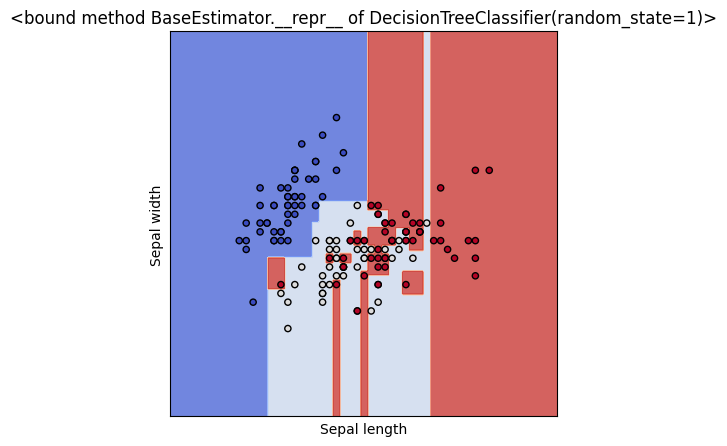

In [139]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #Можно проверить все ли метки классов предсказываются
    #print(np.unique(Z))
    out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_cl(clf):
    title = clf.__repr__
    clf.fit(iris_X, iris_y)
    fig, ax = plt.subplots(figsize=(5,5))
    X0, X1 = iris_X[:, 0], iris_X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=iris_y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()
plot_cl(DecisionTreeClassifier(random_state=1))

### Бустинг

In [140]:
ab1 = AdaBoostClassifier(n_estimators=5, algorithm='SAMME', random_state=10)
ab1.fit(iris_X, iris_y)

AdaBoostClassifier(algorithm='SAMME', n_estimators=5, random_state=10)

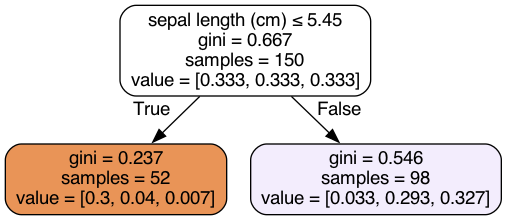

In [141]:
Image(get_png_tree(ab1.estimators_[0], ds.feature_names[:2]), width='40%')

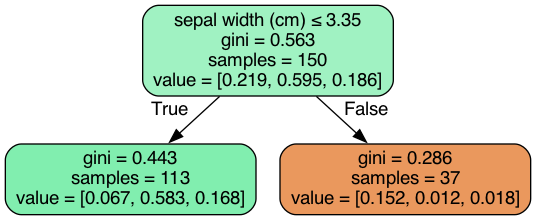

In [142]:
Image(get_png_tree(ab1.estimators_[1], ds.feature_names[:2]), width='40%')

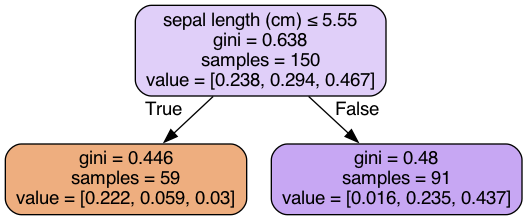

In [143]:
Image(get_png_tree(ab1.estimators_[2], ds.feature_names[:2]), width='40%')

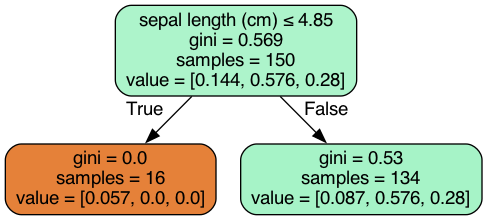

In [144]:
Image(get_png_tree(ab1.estimators_[3], ds.feature_names[:2]), width='40%')

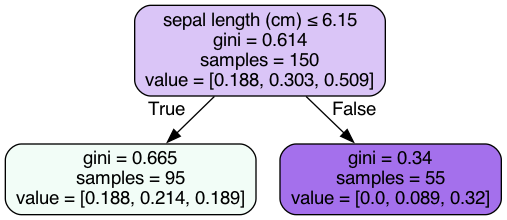

In [145]:
Image(get_png_tree(ab1.estimators_[4], ds.feature_names[:2]), width='40%')

In [146]:
ab1.estimator_weights_

array([1.21109027, 1.71357397, 1.35360531, 1.24138009, 0.83110679])

In [147]:
df1 = ab1.decision_function(iris_X)
df1.shape

(150, 3)

In [148]:
df1[:10]

array([[0.67366299, 0.32633701, 0.        ],
       [0.40384096, 0.59615904, 0.        ],
       [0.5993106 , 0.4006894 , 0.        ],
       [0.5993106 , 0.4006894 , 0.        ],
       [0.67366299, 0.32633701, 0.        ],
       [0.67366299, 0.32633701, 0.        ],
       [0.86913263, 0.13086737, 0.        ],
       [0.67366299, 0.32633701, 0.        ],
       [0.5993106 , 0.4006894 , 0.        ],
       [0.40384096, 0.59615904, 0.        ]])

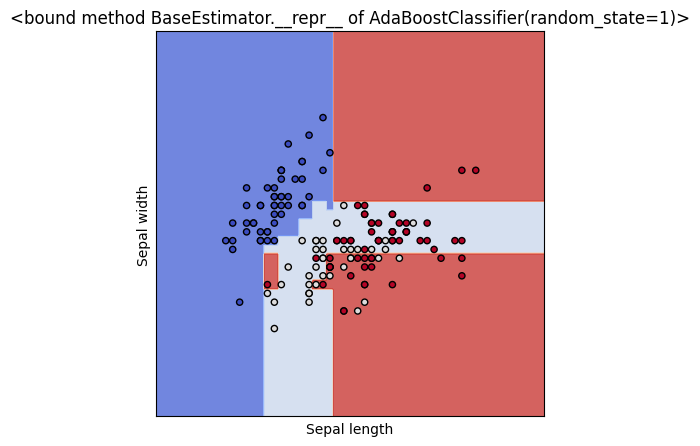

In [149]:
plot_cl(AdaBoostClassifier(random_state=1))

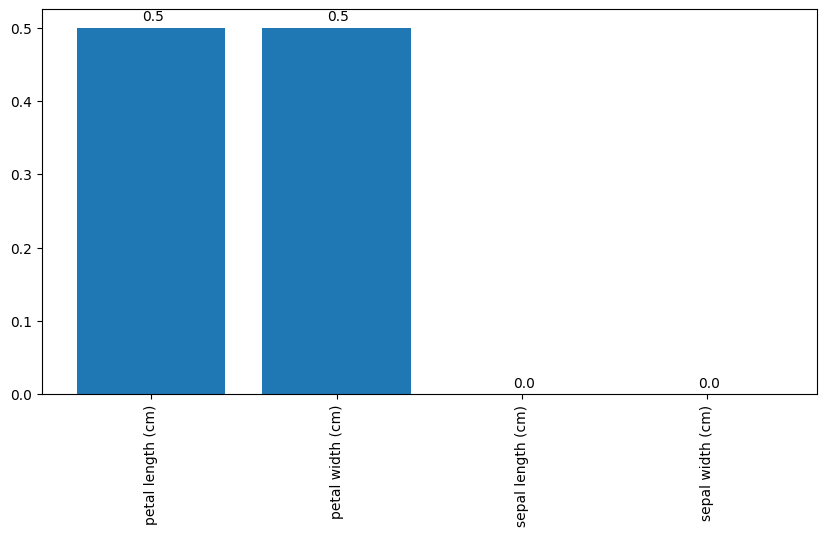

In [150]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(10,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

iris_x_ds = pd.DataFrame(data=ds['data'], columns=ds['feature_names'])
ab2 = AdaBoostClassifier(random_state=1)
ab2.fit(iris_x_ds, ds.target)
_,_ = draw_feature_importances(ab2, iris_x_ds)

## Стекинг

In [151]:
def val_mae(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = mean_absolute_error(y_test, y_pred)
    print(model)
    print('MAE={}'.format(result))

In [152]:
for model in [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(n_estimators=50)
]:
    val_mae(model)
    print('==========================')
    print()

LinearRegression()
MAE=0.20171778209678323

DecisionTreeRegressor()
MAE=0.08

RandomForestRegressor(n_estimators=50)
MAE=0.06080000000000001



In [153]:
dataset = Dataset(X_train, y_train, X_test)

In [161]:
model_tree = Regressor(dataset=dataset, estimator=DecisionTreeRegressor, name='tree')
model_lr = Regressor(dataset=dataset, estimator=LinearRegression,name='lr')
model_rf = Regressor(dataset=dataset, estimator=RandomForestRegressor, parameters={'n_estimators': 50},name='rf')

In [162]:
pipeline = ModelsPipeline(model_tree, model_lr)
stack_ds = pipeline.stack(k=10, seed=1)
# модель второго уровня
stacker = Regressor(dataset=stack_ds, estimator=LinearRegression)
results = stacker.validate(k=10,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [0.17081515612463896, 0.14143284991104105, 0.10609119233791114, 0.18004801783734437, 0.07436735224932983, 0.15990310908830654, 0.1591113062757908, 0.1266532535111755, 0.11043404201598409, 0.17355974255116716]
Mean accuracy: 0.14024160219026896
Standard Deviation: 0.03309418713701339
Variance: 0.0010952252222596627


In [163]:
stack_ds = pipeline.stack(k=10, seed=1)
stacker = Regressor(dataset=stack_ds, estimator=RandomForestRegressor)
results = stacker.validate(k=10,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [0.027499999999999997, 0.10500000000000001, 0.03375, 0.12125, 0.0, 0.06571428571428571, 0.0057142857142857195, 0.031428571428571424, 0.12285714285714285, 0.14142857142857143]
Mean accuracy: 0.06546428571428572
Standard Deviation: 0.05020044007450004
Variance: 0.0025200841836734694


In [164]:
# Эксперимент 3
# Первый уровень - три модели: дерево, линейная регрессия и случайный лес
# Второй уровень: линейная регрессия
pipeline = ModelsPipeline(model_tree, model_lr, model_rf)
stack_ds3 = pipeline.stack(k=10, seed=1)
# модель второго уровня
stacker = Regressor(dataset=stack_ds3, estimator=LinearRegression)
results = stacker.validate(k=10,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [0.0820751424773805, 0.10750820345145327, 0.11199217536353251, 0.1311720650148756, 0.0458560959310263, 0.140276979280042, 0.10823276738312201, 0.0794651161162457, 0.1561550119020172, 0.14026346863254738]
Mean accuracy: 0.11029970255522425
Standard Deviation: 0.03201583109487226
Variance: 0.0010250134406953892


In [165]:
# Эксперимент 4
# Первый уровень - три модели: дерево, линейная регрессия и случайный лес
# Второй уровень: случайный лес
# Результат хуже чем в эксперименте 3
stacker = Regressor(dataset=stack_ds3, estimator=RandomForestRegressor)
results = stacker.validate(k=10,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [0.012500000000000011, 0.03125, 0.08875, 0.11499999999999999, 0.0, 0.06857142857142857, 0.028571428571428564, 0.05714285714285713, 0.08, 0.08142857142857143]
Mean accuracy: 0.056321428571428564
Standard Deviation: 0.035110721369718975
Variance: 0.0012327627551020407


In [166]:
# Результаты
array_labels = ['LR','TREE', 'RF', 'TREE+LR=>LR', 
                'TREE+LR=>RF', 'TREE+LR+RF=>LR', 'TREE+LR+RF=>RF']
array_mae = [3.7507121808389168, 2.942156862745098, 2.263039215686275, 
             2.6766504031924305, 2.6775473780487804, 2.2998386142710823, 
             2.406510426829268]

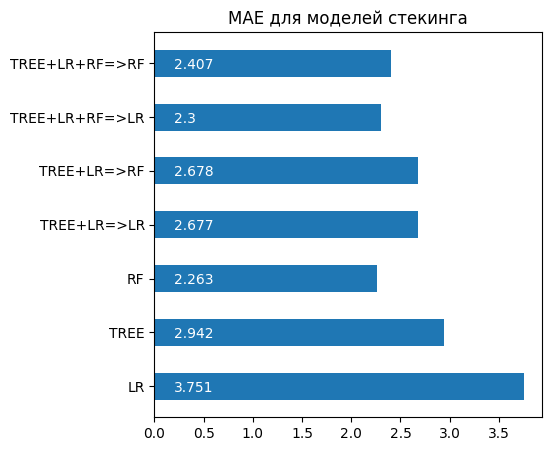

In [167]:
def vis_models_quality(array_metric, array_labels, str_header, figsize=(5, 5)):
    fig, ax1 = plt.subplots(figsize=figsize)
    pos = np.arange(len(array_metric))
    rects = ax1.barh(pos, array_metric,
                     align='center',
                     height=0.5, 
                     tick_label=array_labels)
    ax1.set_title(str_header)
    for a,b in zip(pos, array_metric):
        plt.text(0.2, a-0.1, str(round(b,3)), color='white')
    plt.show()
vis_models_quality(array_mae, array_labels, 'MAE для моделей стекинга')

## Метрики

In [168]:
lab = preprocessing.LabelEncoder()
cl1_1 = KNeighborsClassifier(n_neighbors=10)
y_transformed = lab.fit_transform(y_train)
cl1_1.fit(X_train, y_transformed)
target1_2 = cl1_1.predict(X_test)
len(target1_2), target1_2

(75,
 array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
        2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
        1, 2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 0, 2,
        0, 2, 2, 1, 1, 2, 2, 0, 1]))

In [169]:
# 10 ближайших соседей
accuracy_score(y_test, target1_2)

0.9733333333333334